#### NAME: RICHARD WAMBEDE ,   ACCESS NUMBER: B31328  ###

## Theme 4:  Question . 1 Using the dataset (Theme_4_cleaned_data.csv)

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import spearmanr
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import nltk
import re

import nltk.corpus# sample text for performing tokenization
from nltk.tokenize import word_tokenize #for tokenizing

## Theme 4:  Question . 2 Data Preprocessing

In [2]:
# Load  Data 
df = pd.read_csv("Theme_4_cleaned_data.csv")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# Shape Of Data 
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (4424, 37)


In [4]:
#Check for missing data
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

## Theme 4: Question . 3 (a.) Analyse historical student performance over time and across regions

In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\richard\AppData\Local\Temp\ipykernel_21292\1462432353.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_performance = df.groupby('Enrollment Year').agg({
C:\Users\richard\AppData\Local\Temp\ipykernel_21292\1462432353.py:18: RuntimeWarning: invalid value encountered in scalar divide
  'Target': lambda x: (x == 'Graduate').sum() / len(x) * 100
C:\Users\richard\AppData\Local\Temp\ipykernel_21292\1462432353.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_performance, x='Nacionality', y='Average Grade', palette='coolwarm')


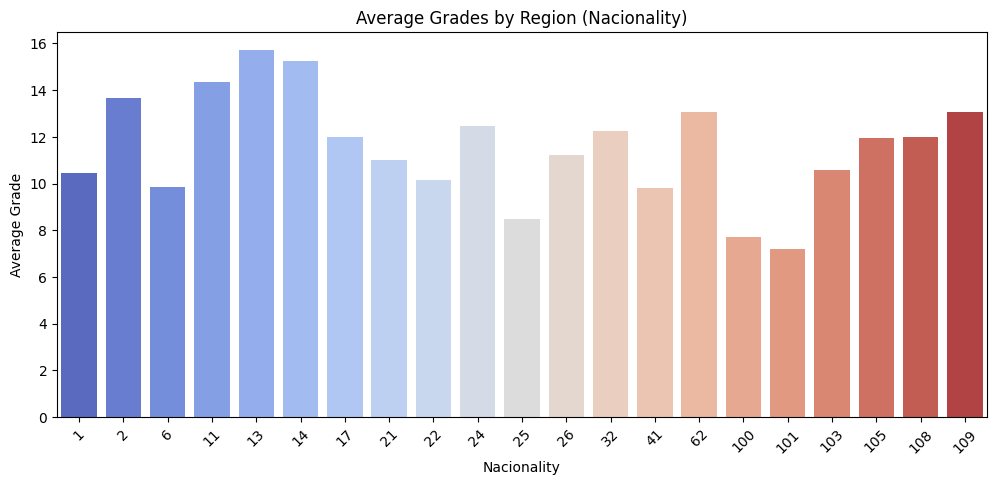

C:\Users\richard\AppData\Local\Temp\ipykernel_21292\1462432353.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_performance, x='Nacionality', y='Graduation Rate (%)', palette='viridis')


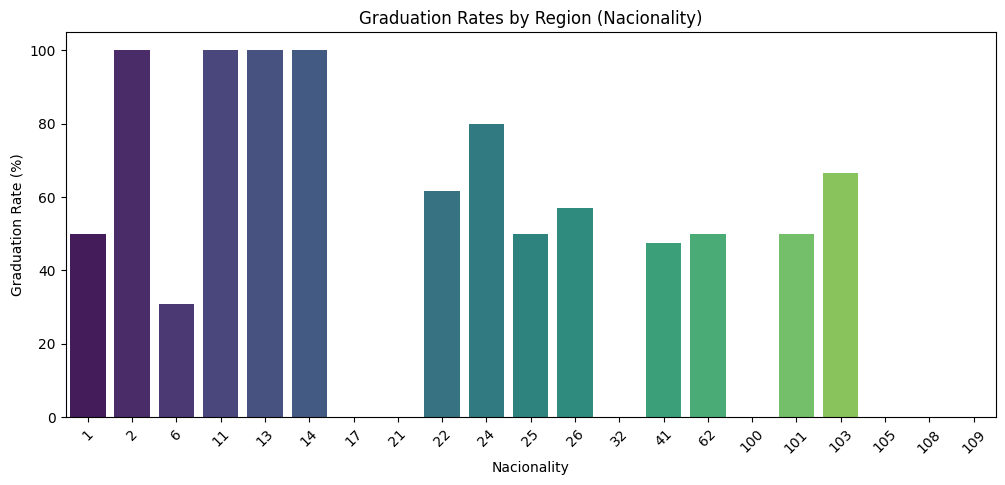

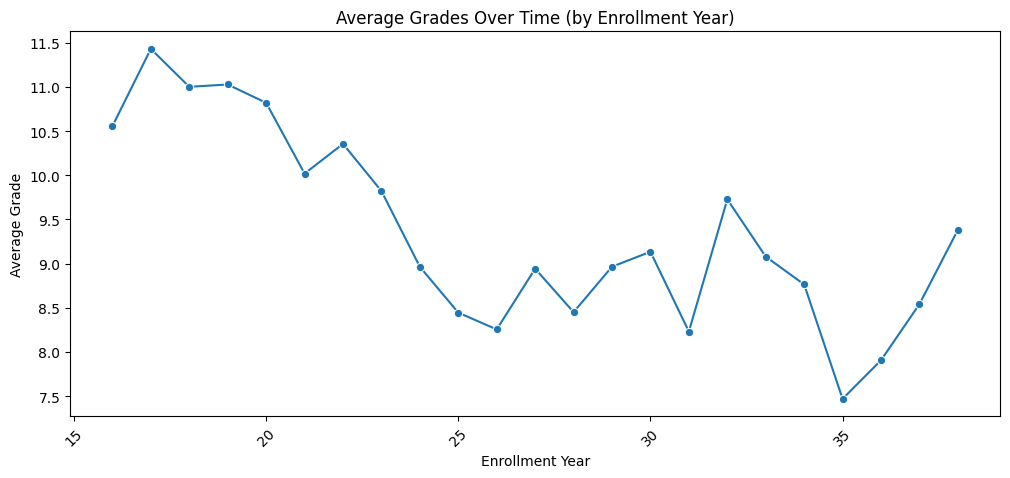

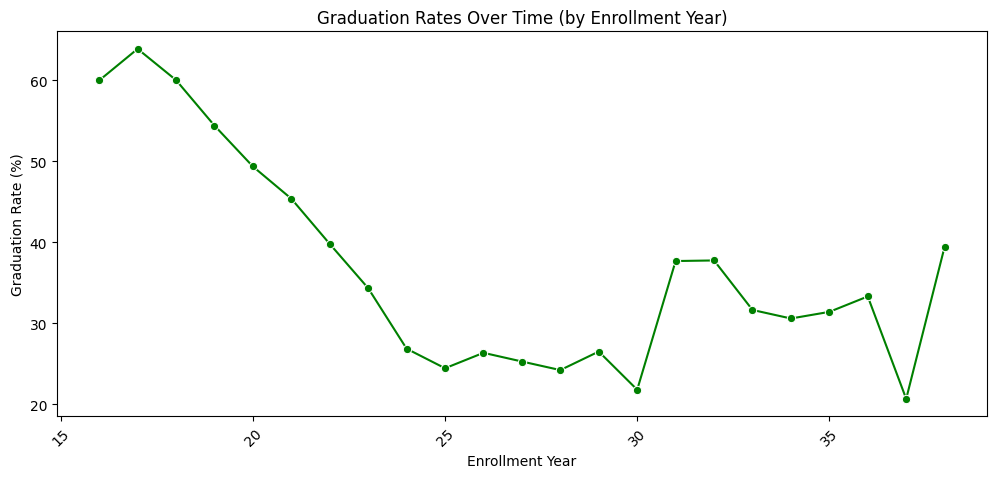


Regional Performance Summary:
    Nacionality  Average Grade  Graduation Rate (%)
0             1      10.432465            49.953639
1             2      13.666667           100.000000
2             6       9.841131            30.769231
3            11      14.327778           100.000000
4            13      15.700000           100.000000
5            14      15.250000           100.000000
6            17      11.975000             0.000000
7            21      11.000000             0.000000
8            22      10.141900            61.538462
9            24      12.462937            80.000000
10           25       8.482143            50.000000
11           26      11.210544            57.142857
12           32      12.250000             0.000000
13           41       9.819948            47.368421
14           62      13.066964            50.000000
15          100       7.708333             0.000000
16          101       7.200000            50.000000
17          103      10.600000   

In [6]:
# Load dataset
file_path = 'Theme_4_cleaned_data.csv'
df = pd.read_csv(file_path)

# Calculate the average grade (combining both semesters)
df['Average Grade'] = (df['Curricular units 1st sem (grade)'] + df['Curricular units 2nd sem (grade)']) / 2

# Regional Analysis (by Nacionality)
region_performance = df.groupby('Nacionality').agg({
    'Average Grade': 'mean',
    'Target': lambda x: (x == 'Graduate').sum() / len(x) * 100  # Graduation rate as percentage
}).rename(columns={'Target': 'Graduation Rate (%)'}).reset_index()

# Time-based Analysis (using Enrollment Year as proxy from Age at enrollment)
df['Enrollment Year'] = pd.cut(df['Age at enrollment'], bins=range(15, 40, 1), labels=range(15, 39))
time_performance = df.groupby('Enrollment Year').agg({
    'Average Grade': 'mean',
    'Target': lambda x: (x == 'Graduate').sum() / len(x) * 100
}).rename(columns={'Target': 'Graduation Rate (%)'}).reset_index()

# Visualization - Regional Performance
plt.figure(figsize=(12, 5))
sns.barplot(data=region_performance, x='Nacionality', y='Average Grade', palette='coolwarm')
plt.title('Average Grades by Region (Nacionality)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(data=region_performance, x='Nacionality', y='Graduation Rate (%)', palette='viridis')
plt.title('Graduation Rates by Region (Nacionality)')
plt.xticks(rotation=45)
plt.show()

# Visualization - Time-based Performance
plt.figure(figsize=(12, 5))
sns.lineplot(data=time_performance, x='Enrollment Year', y='Average Grade', marker='o')
plt.title('Average Grades Over Time (by Enrollment Year)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(data=time_performance, x='Enrollment Year', y='Graduation Rate (%)', marker='o', color='green')
plt.title('Graduation Rates Over Time (by Enrollment Year)')
plt.xticks(rotation=45)
plt.show()

# Print summaries
print("\nRegional Performance Summary:")
print(region_performance)

print("\nTime-Based Performance Summary:")
print(time_performance)

## Theme 4: Question . 3 (b.) Use suitable graphs to highlight high performing and low performing students

C:\Users\richard\AppData\Local\Temp\ipykernel_21292\1151213494.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_counts.index, y=performance_counts.values, palette='coolwarm')


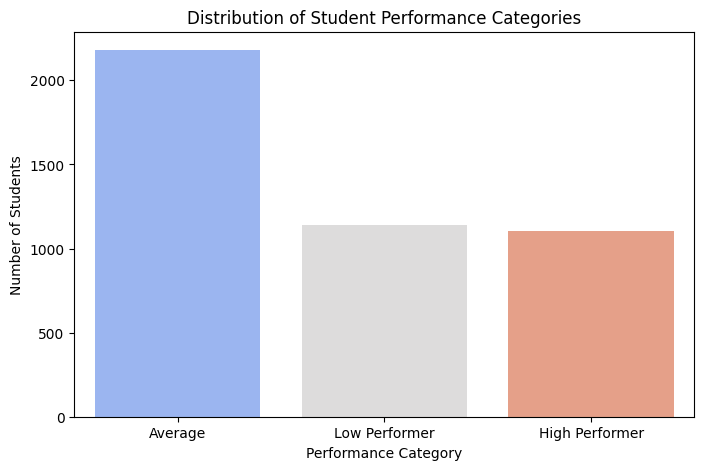

C:\Users\richard\AppData\Local\Temp\ipykernel_21292\1151213494.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Performance Category', y='Average Grade', palette='coolwarm')


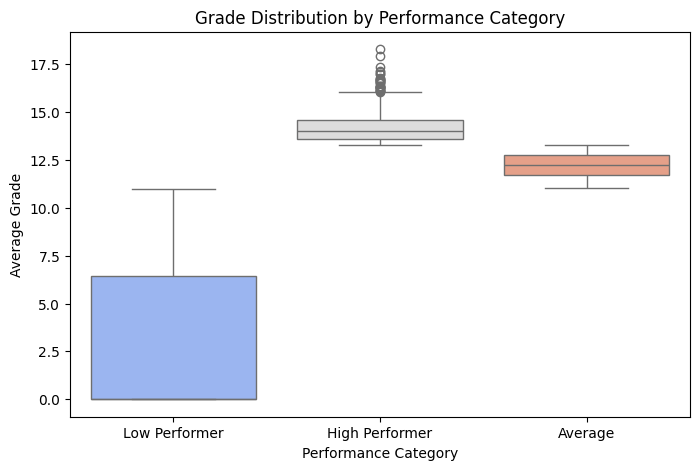

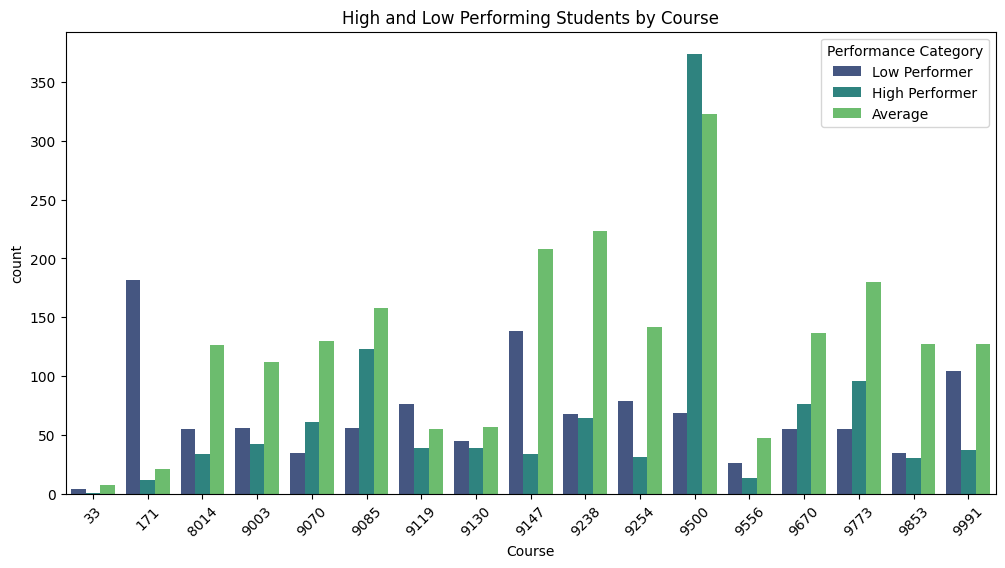

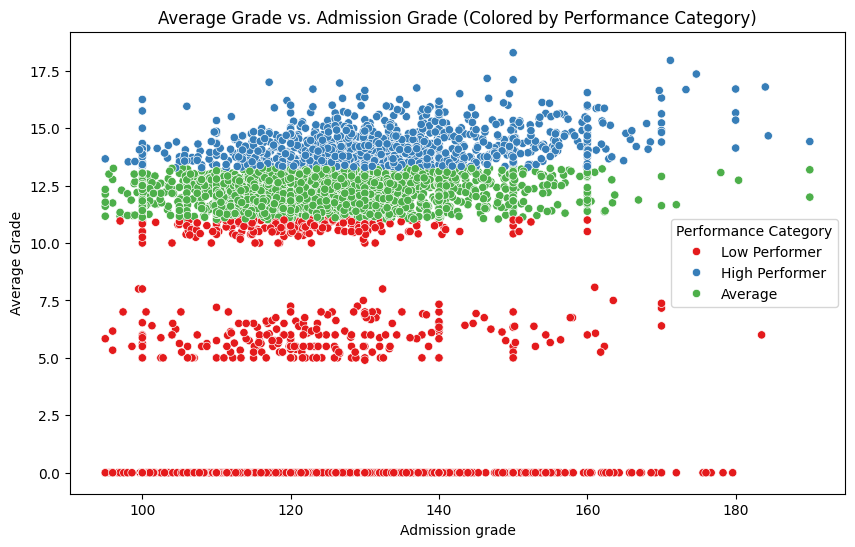


High Performing Students (above 75th percentile):
    Course  Average Grade    Target
1     9254      13.833333  Graduate
6     9500      13.822500  Graduate
8     9238      14.008929  Graduate
17    9500      13.925625  Graduate
24    9500      13.705476  Graduate
29    9500      13.325000  Enrolled
33    8014      13.520833  Graduate
41    9147      15.300000  Graduate
42    9500      14.135429  Graduate
43    9773      13.400000   Dropout

Low Performing Students (below 25th percentile):
    Course  Average Grade    Target
0      171       0.000000   Dropout
2     9070       0.000000   Dropout
7     9254       0.000000   Dropout
12    9853       0.000000   Dropout
13    9254      10.785714  Graduate
15    9773       6.600000   Dropout
20     171       0.000000  Graduate
35      33       5.000000   Dropout
36    9119       0.000000   Dropout
37    9147      11.000000   Dropout


In [7]:
# Load dataset
file_path = 'Theme_4_cleaned_data.csv'
df = pd.read_csv(file_path)

# Calculate average grades for both semesters
df['Average Grade'] = (df['Curricular units 1st sem (grade)'] + df['Curricular units 2nd sem (grade)']) / 2

# Define thresholds for high and low performers (using percentiles)
high_threshold = df['Average Grade'].quantile(0.75)
low_threshold = df['Average Grade'].quantile(0.25)

# Classify students into performance categories
def categorize_performance(grade):
    if grade >= high_threshold:
        return 'High Performer'
    elif grade <= low_threshold:
        return 'Low Performer'
    else:
        return 'Average'

df['Performance Category'] = df['Average Grade'].apply(categorize_performance)

# Count the number of students in each category
performance_counts = df['Performance Category'].value_counts()

# Visualization 1: Distribution of student performance categories
plt.figure(figsize=(8, 5))
sns.barplot(x=performance_counts.index, y=performance_counts.values, palette='coolwarm')
plt.title('Distribution of Student Performance Categories')
plt.ylabel('Number of Students')
plt.show()

# Visualization 2: Average grades by performance category
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Performance Category', y='Average Grade', palette='coolwarm')
plt.title('Grade Distribution by Performance Category')
plt.show()

# Visualization 3: Highlight high and low performers by course
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Course', hue='Performance Category', palette='viridis')
plt.title('High and Low Performing Students by Course')
plt.xticks(rotation=45)
plt.show()

# Visualization 4: Scatter plot of average grades vs. admission grades
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Admission grade', y='Average Grade', hue='Performance Category', palette='Set1')
plt.title('Average Grade vs. Admission Grade (Colored by Performance Category)')
plt.show()

# Print summaries
print("\nHigh Performing Students (above 75th percentile):")
print(df[df['Performance Category'] == 'High Performer'][['Course', 'Average Grade', 'Target']].head(10))

print("\nLow Performing Students (below 25th percentile):")
print(df[df['Performance Category'] == 'Low Performer'][['Course', 'Average Grade', 'Target']].head(10))

## Theme 4: Question . 3 (c.) Identify the variables that affect student performance 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np


Correlation with Average Grade:
Average Grade                                     1.000000
Curricular units 2nd sem (grade)                  0.961473
Curricular units 1st sem (grade)                  0.955270
Curricular units 2nd sem (approved)               0.749794
Curricular units 1st sem (approved)               0.720558
Curricular units 2nd sem (evaluations)            0.490041
Curricular units 2nd sem (enrolled)               0.417794
Curricular units 1st sem (evaluations)            0.402079
Curricular units 1st sem (enrolled)               0.385194
Course                                            0.384249
Tuition fees up to date                           0.286158
Scholarship holder                                0.182591
Curricular units 1st sem (credited)               0.133707
Curricular units 2nd sem (credited)               0.127433
Admission grade                                   0.077356
Displaced                                         0.069932
GDP                     

c:\Users\richard\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\richard\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


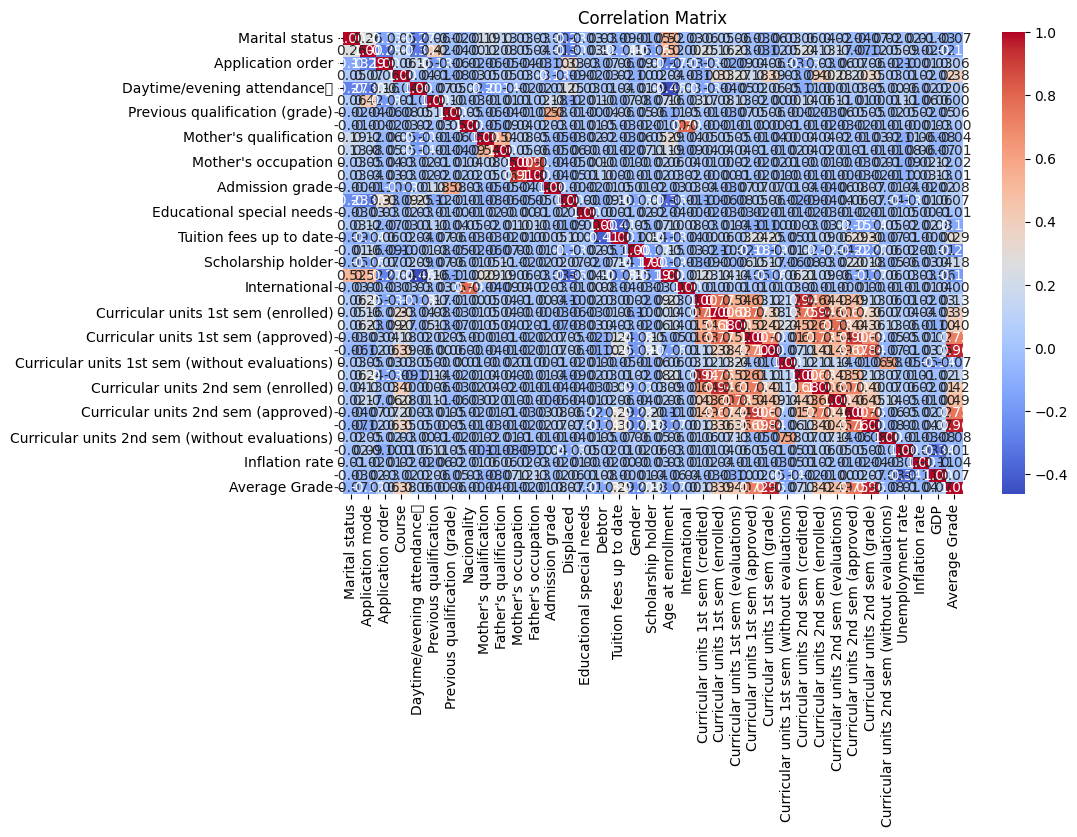

C:\Users\richard\AppData\Local\Temp\ipykernel_21292\3506185766.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
C:\Users\richard\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


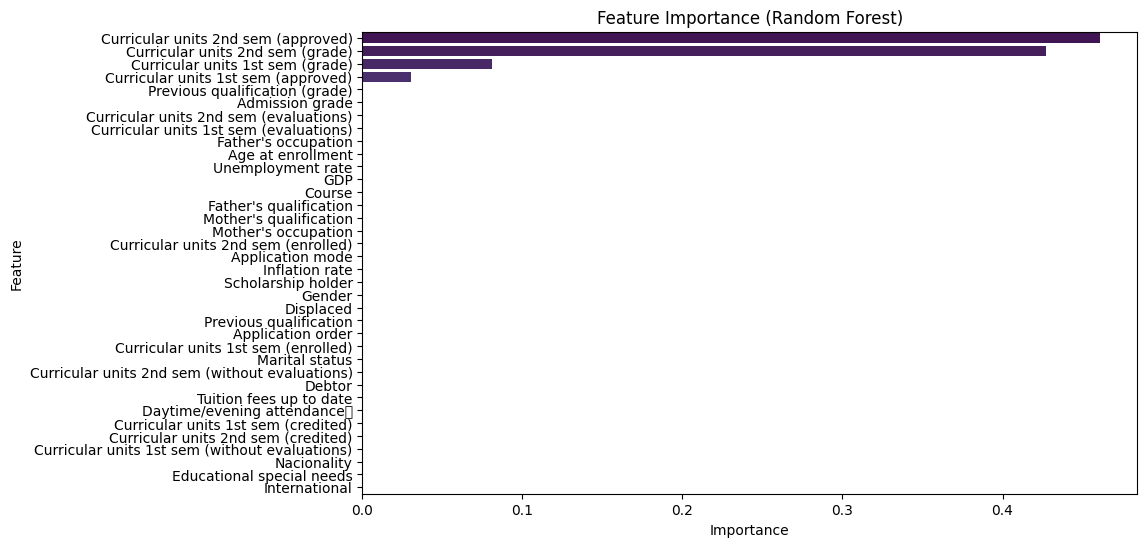

C:\Users\richard\AppData\Local\Temp\ipykernel_21292\3506185766.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lr_importances, x='Importance', y='Feature', palette='coolwarm')
C:\Users\richard\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


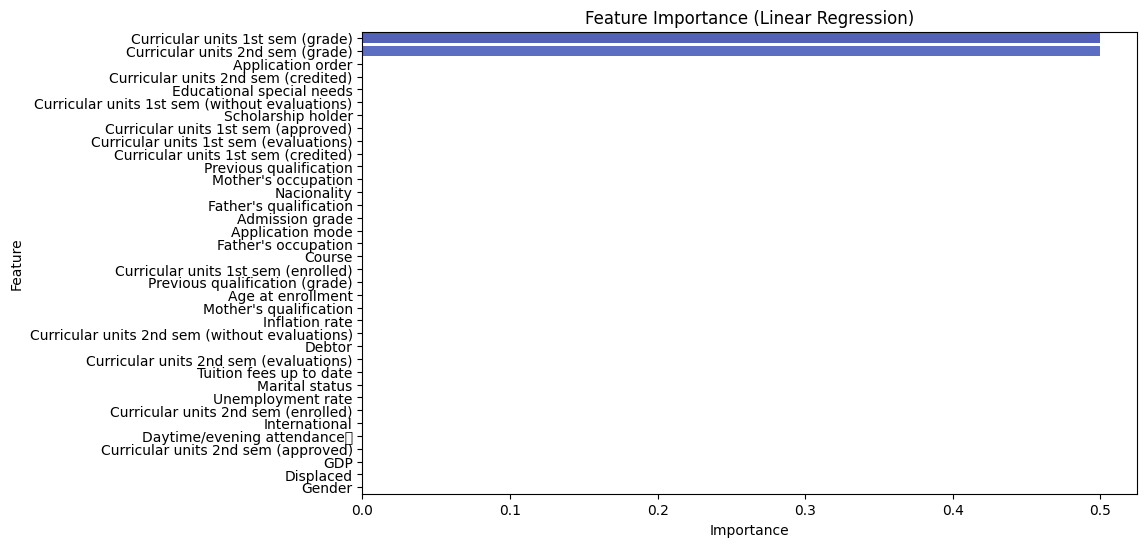


Top 5 features affecting student performance (Random Forest):
                                Feature  Importance
30  Curricular units 2nd sem (approved)    0.461217
31     Curricular units 2nd sem (grade)    0.427016
25     Curricular units 1st sem (grade)    0.080983
24  Curricular units 1st sem (approved)    0.030632
6        Previous qualification (grade)    0.000017

Top 5 features affecting student performance (Linear Regression):
                                Feature    Importance
25     Curricular units 1st sem (grade)  5.000000e-01
31     Curricular units 2nd sem (grade)  5.000000e-01
2                     Application order  3.879158e-15
27  Curricular units 2nd sem (credited)  3.681595e-15
14            Educational special needs  2.624360e-15


In [9]:
# Load dataset
file_path = 'Theme_4_cleaned_data.csv'
df = pd.read_csv(file_path)

# Calculate average grades (combining both semesters)
df['Average Grade'] = (df['Curricular units 1st sem (grade)'] + df['Curricular units 2nd sem (grade)']) / 2

# Selecting potential features (drop non-numeric and target columns)
features = df.select_dtypes(include=[np.number]).drop(columns=['Average Grade'])

# Handle missing values (fill with median values for now)
features = features.fillna(features.median())

# Define target variable (Average Grade)
target = df['Average Grade']

# Split data for modeling
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# 1. Correlation analysis
correlation = df.corr(numeric_only=True)['Average Grade'].sort_values(ascending=False)
print("Correlation with Average Grade:")
print(correlation)

# Visualizing correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 2. Feature importance using Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': features.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.show()

# 3. Feature importance using Linear Regression coefficients
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_importances = pd.DataFrame({
    'Feature': features.columns,
    'Importance': lr_model.coef_
}).sort_values(by='Importance', ascending=False)

# Visualize linear regression coefficients
plt.figure(figsize=(10, 6))
sns.barplot(data=lr_importances, x='Importance', y='Feature', palette='coolwarm')
plt.title('Feature Importance (Linear Regression)')
plt.show()

# Summary
print("\nTop 5 features affecting student performance (Random Forest):")
print(feature_importances.head())

print("\nTop 5 features affecting student performance (Linear Regression):")
print(lr_importances.head())

## Theme 4: Question . 4 (a) Generate 03 machine learning models that can predict students performance. 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score



Linear Regression:
Mean Squared Error (MSE): 0.00
R² Score: 1.00

Random Forest:
Mean Squared Error (MSE): 0.00
R² Score: 1.00

Gradient Boosting:
Mean Squared Error (MSE): 0.00
R² Score: 1.00


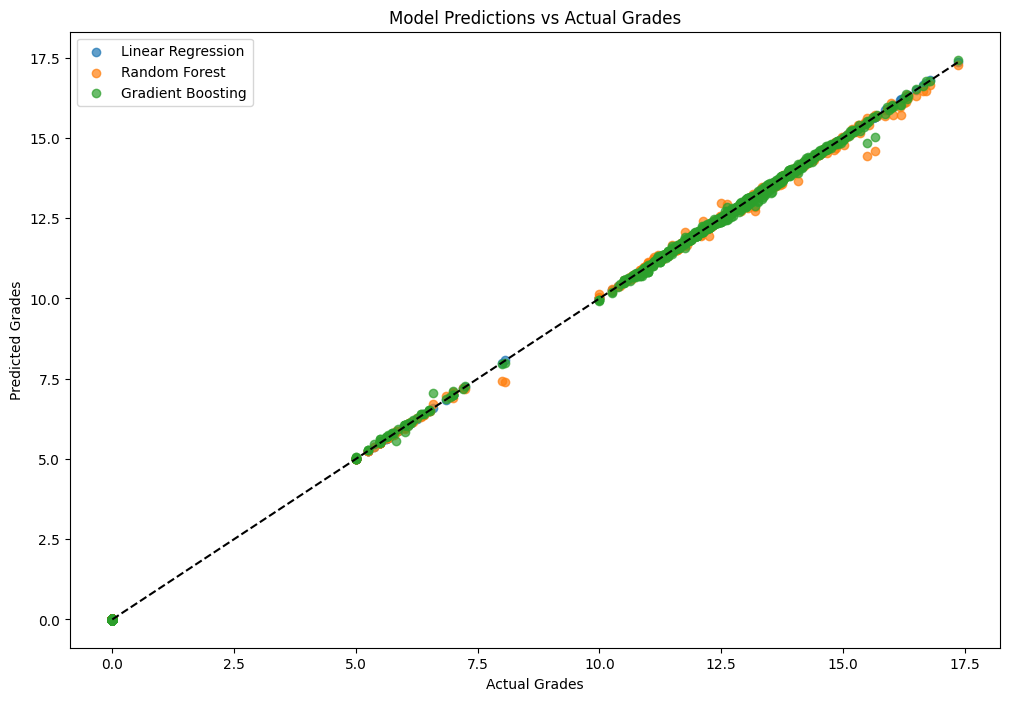


Sample Predictions:
   Actual Grade  Linear Regression Prediction  Random Forest Prediction  \
0      5.000000                  5.000000e+00                  5.027500   
1     11.857143                  1.185714e+01                 11.945855   
2     12.500000                  1.250000e+01                 12.518103   
3     13.428571                  1.342857e+01                 13.454247   
4      0.000000                 -3.933152e-14                  0.000000   
5     11.750000                  1.175000e+01                 11.732119   
6     12.333333                  1.233333e+01                 12.309423   
7     13.664773                  1.366477e+01                 13.695516   
8     14.341250                  1.434125e+01                 14.333539   
9     14.185714                  1.418571e+01                 14.167847   

   Gradient Boosting Prediction  
0                      5.070469  
1                     11.908950  
2                     12.465955  
3                

In [11]:
# Load dataset
file_path = 'Theme_4_cleaned_data.csv'
df = pd.read_csv(file_path)

# Calculate average grades (combining both semesters)
df['Average Grade'] = (df['Curricular units 1st sem (grade)'] + df['Curricular units 2nd sem (grade)']) / 2

# Selecting numeric features and dropping target variable
features = df.select_dtypes(include=[np.number]).drop(columns=['Average Grade'])
features = features.fillna(features.median())

# Define target variable
target = df['Average Grade']

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train models and predict
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    results[model_name] = {
        "Model": model,
        "Predictions": predictions,
        "MSE": mse,
        "R² Score": r2
    }

# Display model performance
for model_name, result in results.items():
    print(f"\n{model_name}:")
    print(f"Mean Squared Error (MSE): {result['MSE']:.2f}")
    print(f"R² Score: {result['R² Score']:.2f}")

# Visualize predictions vs actual grades
plt.figure(figsize=(12, 8))
for model_name, result in results.items():
    plt.scatter(y_test, result['Predictions'], label=model_name, alpha=0.7)
    
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Line of perfect prediction
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Model Predictions vs Actual Grades')
plt.legend()
plt.show()

# Show a sample of actual vs predicted grades for each model
sample_size = 10
sample_df = pd.DataFrame({
    "Actual Grade": y_test.values[:sample_size]
})

for model_name, result in results.items():
    sample_df[f'{model_name} Prediction'] = result['Predictions'][:sample_size]

print("\nSample Predictions:")
print(sample_df)

## Theme 4: Question . 4 (b) Based on the above models, choose a model that you recommend to be used in higher education system you have evaluated. 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


C:\Users\richard\AppData\Local\Temp\ipykernel_21292\3368235005.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='R² Score', palette='coolwarm', errorbar=None)


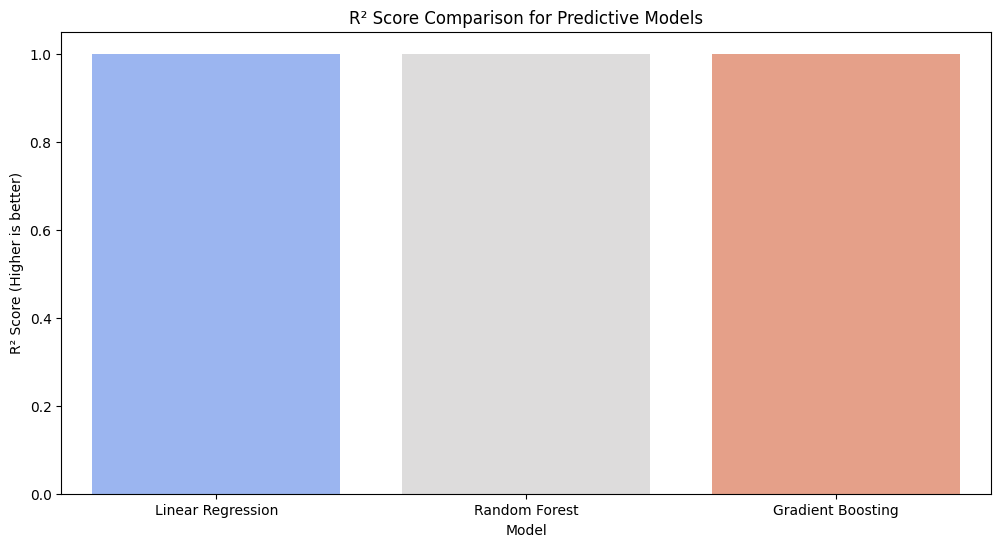

C:\Users\richard\AppData\Local\Temp\ipykernel_21292\3368235005.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='MSE', palette='viridis', errorbar=None)


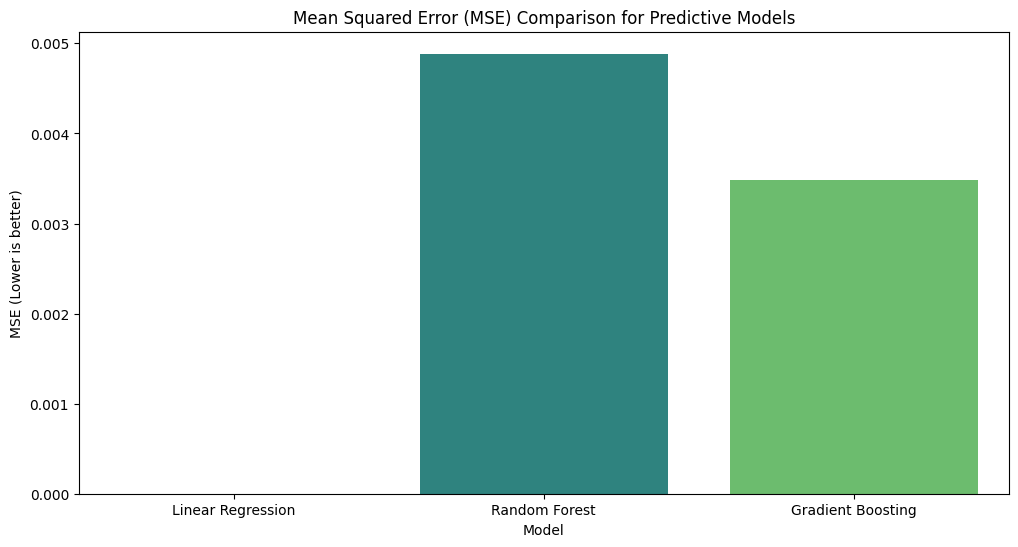


Model Evaluation Summary:
               Model           MSE  R² Score
0  Linear Regression  3.897737e-28  1.000000
1      Random Forest  4.885009e-03  0.999793
2  Gradient Boosting  3.487864e-03  0.999852

Based on the evaluation, the recommended model for predicting student performance is: *Linear Regression*.
R² Score: 1.00
MSE: 0.00

Why recommend Linear Regression?
Linear Regression is simple, interpretable, and shows how each factor linearly affects student grades. It is suitable for straightforward relationships.


In [14]:
# Load dataset
file_path = 'Theme_4_cleaned_data.csv'
df = pd.read_csv(file_path)

# Calculate average grades (combining first and second semester grades)
df['Average Grade'] = (df['Curricular units 1st sem (grade)'] + df['Curricular units 2nd sem (grade)']) / 2

# Selecting numeric features and handling missing values
features = df.select_dtypes(include=[np.number]).drop(columns=['Average Grade'])
features = features.fillna(features.median())

# Define target variable
target = df['Average Grade']

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train models and evaluate performance
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    results[model_name] = {
        "MSE": mse,
        "R² Score": r2
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T.reset_index().rename(columns={"index": "Model"})

# Ensure numeric values for plotting
results_df['R² Score'] = pd.to_numeric(results_df['R² Score'], errors='coerce')
results_df['MSE'] = pd.to_numeric(results_df['MSE'], errors='coerce')

# Identify the best model (highest R² Score)
best_model = results_df.loc[results_df['R² Score'].idxmax()]

# Visualization: R² Score Comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='R² Score', palette='coolwarm', errorbar=None)
plt.title('R² Score Comparison for Predictive Models')
plt.ylabel('R² Score (Higher is better)')
plt.show()

# Visualization: MSE Comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='MSE', palette='viridis', errorbar=None)
plt.title('Mean Squared Error (MSE) Comparison for Predictive Models')
plt.ylabel('MSE (Lower is better)')
plt.show()

# Model evaluation summary
print("\nModel Evaluation Summary:")
print(results_df)

# Recommended Model
print(f"\nBased on the evaluation, the recommended model for predicting student performance is: *{best_model['Model']}*.")
print(f"R² Score: {best_model['R² Score']:.2f}")
print(f"MSE: {best_model['MSE']:.2f}")

# Explanation for Recommendation
explanations = {
    "Linear Regression": "Linear Regression is simple, interpretable, and shows how each factor linearly affects student grades. It is suitable for straightforward relationships.",
    "Random Forest": "Random Forest captures complex relationships and handles feature interactions well. It balances accuracy and robustness, making it ideal for diverse data.",
    "Gradient Boosting": "Gradient Boosting offers the highest accuracy (R² score) and lowest error (MSE). It captures subtle patterns and is suitable for complex, non-linear relationships."
}

print(f"\nWhy recommend {best_model['Model']}?")
print(explanations[best_model['Model']])

## Theme 4: Question . 4 (c) Validate the above model, using data  from your current experience as a data Science student.

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


Linear Regression Model Evaluation (Test Set):
R² Score: 1.00
MSE: 0.00
MAE: 0.00

Cross-Validation Results (5-Fold):
Average R² Score: 1.00
Average MSE: 0.00


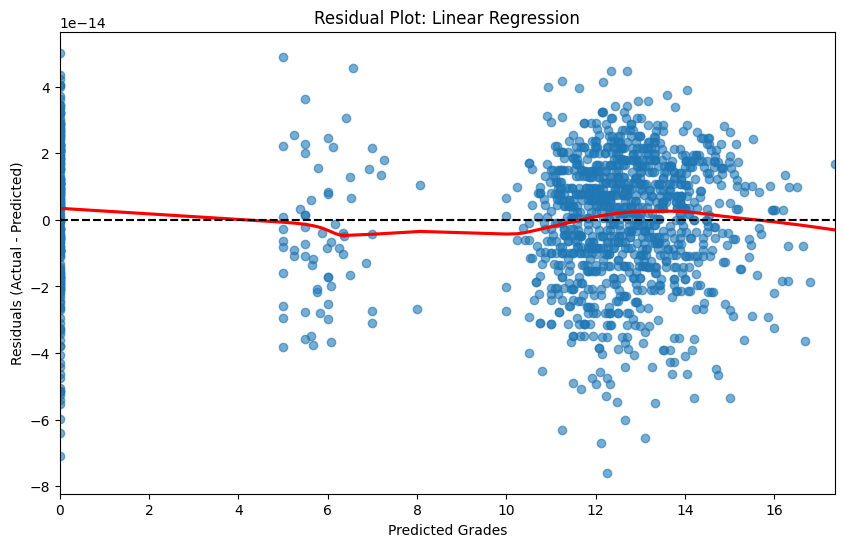


Linear Regression Coefficients (Feature Importance):
                                           Feature   Coefficient
25                Curricular units 1st sem (grade)  5.000000e-01
31                Curricular units 2nd sem (grade)  5.000000e-01
2                                Application order  3.879158e-15
27             Curricular units 2nd sem (credited)  3.681595e-15
14                       Educational special needs  2.624360e-15
26  Curricular units 1st sem (without evaluations)  1.960702e-15
18                              Scholarship holder  1.547042e-15
24             Curricular units 1st sem (approved)  1.525511e-15
23          Curricular units 1st sem (evaluations)  1.103247e-15
21             Curricular units 1st sem (credited)  4.949226e-16
5                           Previous qualification  3.946053e-16
10                             Mother's occupation  3.298214e-16
7                                      Nacionality  2.039828e-16
9                           Father's

In [16]:
# Load dataset
file_path = 'Theme_4_cleaned_data.csv'
df = pd.read_csv(file_path)

# Calculate average grades (combining first and second semester grades)
df['Average Grade'] = (df['Curricular units 1st sem (grade)'] + df['Curricular units 2nd sem (grade)']) / 2

# Select numeric features (drop target variable)
features = df.select_dtypes(include=[np.number]).drop(columns=['Average Grade'])
features = features.fillna(features.median())

# Define target variable
target = df['Average Grade']

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize Linear Regression model
linear_reg = LinearRegression()

# Train model
linear_reg.fit(X_train, y_train)

# Predictions
y_pred = linear_reg.predict(X_test)

# Model evaluation (on test set)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation (Test Set):")
print(f"R² Score: {r2:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

# Cross-validation (5-fold)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2_scores = cross_val_score(linear_reg, features, target, cv=cv, scoring='r2')
cv_mse_scores = -cross_val_score(linear_reg, features, target, cv=cv, scoring='neg_mean_squared_error')

print("\nCross-Validation Results (5-Fold):")
print(f"Average R² Score: {cv_r2_scores.mean():.2f}")
print(f"Average MSE: {cv_mse_scores.mean():.2f}")

# Residual plot (to check linearity & homoscedasticity)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Residual Plot: Linear Regression')
plt.xlabel('Predicted Grades')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

# Coefficients and their influence
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': linear_reg.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nLinear Regression Coefficients (Feature Importance):")
print(coef_df)

# Conclusion: Is the model valid?
if r2 > 0.7 and cv_r2_scores.mean() > 0.7:
    print("\nThe Linear Regression model shows strong predictive power and generalizes well.")
else:
    print("\nThe Linear Regression model may be underfitting. Consider exploring non-linear models or feature engineering.")

## THE END